In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler    
from sklearn.linear_model import LinearRegression

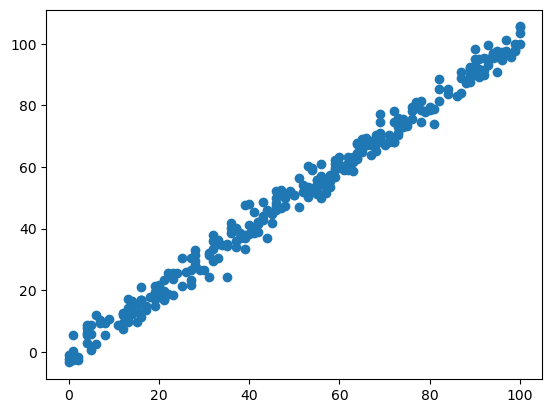

In [37]:
data=pd.read_csv("test.csv")
X_train=data["x"]
m=len(X_train)
X_train=np.array(X_train)
X_train=X_train.reshape(-1,1)
y_train=data["y"]
plt.scatter(x_train,y_train)

In [38]:
#print(m,x_train,y_train)
X_norm=StandardScaler().fit(X_train).transform(X_train)

3.514106108480256 100 [100]


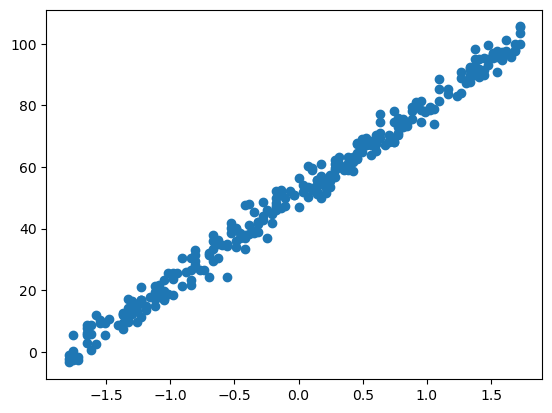

In [43]:
print(np.ptp(X_norm),np.ptp(X_train),max(X_train))
plt.scatter(X_norm,y_train)

In [40]:
reg=LinearRegression()
reg.fit(X_norm,y_train)

LinearRegression()

In [56]:
print(reg.predict([X_norm[50]]))
print(X_train[50],y_train[50])

[94.88571261]
[94] 95.28503937


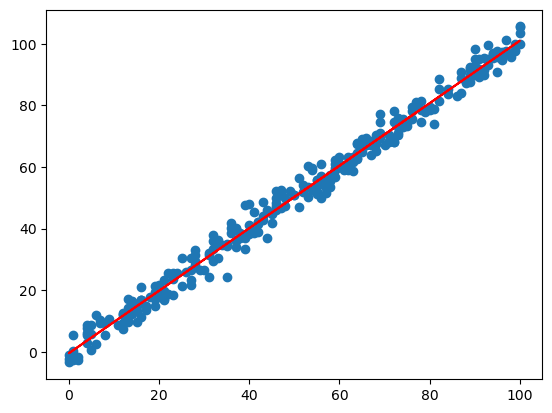

In [66]:
plt.scatter(X_train,y_train)
plt.plot(X_train,reg.predict(X_norm),color='r')
#plt.plot(reg.predict([X_norm[50]]))

In [ ]:
8